# Analisis Data Keuangan Perusahaan Indonesia (2019–2023)

1:PENDAHULUAN.

   Dokumen ini menyajikan analisis data keuangan dari berbagai perusahaan publik di Indonesia selama tahun 2019 hingga 2023. Tujuan utama dari analisis ini adalah untuk memberikan wawasan kepada publik terkait kinerja dan efisiensi perusahaan berdasarkan indikator keuangan seperti laba bersih, pendapatan, ROE, ROA, EPS, serta produktivitas karyawan.

Semua visualisasi dibuat dengan tujuan agar pembaca dapat dengan mudah memahami informasi yang disajikan, tanpa harus melakukan analisis sendiri secara mendalam.

2:PERSIAPAN DATA

In [ ]:
# Impor pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi tampilan
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set(style='whitegrid')

# Unggah file
from google.colab import files
uploaded = files.upload()

# Baca file Excel
import io
df = pd.read_excel(io.BytesIO(uploaded['Dataset keuangan perusahaan di indonesia rentang tahun 2019-2023 (10).xlsx']))

# Tampilkan informasi awal
df.info()
df

Saving Dataset keuangan perusahaan di indonesia rentang tahun 2019-2023.xlsx to Dataset keuangan perusahaan di indonesia rentang tahun 2019-2023 (10).xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Perusahaan              75 non-null     object 
 1   Tahun                   75 non-null     int64  
 2   Pendapatan (Rp)         75 non-null     int64  
 3   Laba Bersih (Rp)        75 non-null     int64  
 4   Total Aset (Rp)         75 non-null     int64  
 5   Liabilitas (Rp)         75 non-null     int64  
 6   Ekuitas (Rp)            75 non-null     int64  
 7   Jumlah Karyawan         75 non-null     int64  
 8   EPS                     75 non-null     int64  
 9   ROE                     75 non-null     float64
 10  ROA                     75 non-null     float64
 11  Market Cap (Rp)         75 non-null     int64  


,Perusahaan,Tahun,Pendapatan (Rp),Laba Bersih (Rp),Total Aset (Rp),Liabilitas (Rp),Ekuitas (Rp),Jumlah Karyawan,EPS,ROE,ROA,Market Cap (Rp)
0,Bank BRI,2019,150000000000000,18000000000000,300000000000000,180000000000000,120000000000000,50000,360,0.01,0.00,200000000000000
1,Bank BRI,2020,160000000000000,20000000000000,320000000000000,190000000000000,130000000000000,51000,370,0.01,0.00,210000000000000
2,Bank BRI,2021,175000000000000,25000000000000,340000000000000,200000000000000,140000000000000,52000,390,0.01,0.00,225000000000000
3,Bank BRI,2022,190000000000000,28000000000000,360000000000000,210000000000000,150000000000000,53000,420,0.01,0.01,240000000000000
4,Bank BRI,2023,200000000000000,30000000000000,380000000000000,220000000000000,160000000000000,54000,440,0.01,0.01,255000000000000
5,Telkom Indonesia,2019,140000000000000,22000000000000,260000000000000,150000000000000,110000000000000,29000,280,0.01,0.01,180000000000000
6,Telkom Indonesia,2020,145000000000000,23000000000000,270000000000000,160000000000000,110000000000000,30000,290,0.01,0.01,185000000000000
7,Telkom Indonesia,2021,150000000000000,24000000000000,280000000000000,165000000000000,115000000000000,31000,300,0.01,0.01,190000000000000
8,Telkom Indonesia,2022,160000000000000,26000000000000,290000000000000,170000000000000,120000000000000,32000,310,0.02,0.01,200000000000000
9,Telkom Indonesia,2023,170000000000000,28000000000000,300000000000000,175000000000000,125000000000000,33000,320,0.02,0.01,210000000000000


Pembersihan Data

In [ ]:
# === Pembersihan & Persiapan Data ===

# 1. Standarisasi nama kolom: hapus spasi di awal/akhir dan ubah ke format konsisten
df.columns = df.columns.str.strip()

# 2. Tampilkan nama kolom untuk verifikasi
print("Kolom setelah standarisasi:")
print(df.columns.tolist())

# 3. Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

# 4. Cek tipe data
print("\nTipe data per kolom:")
print(df.dtypes)

# 5. (Opsional) Pastikan kolom numerik dalam format float
numerical_cols = ['Pendapatan (Rp)', 'Laba Bersih (Rp)', 'Total Aset (Rp)',
                  'Liabilitas (Rp)', 'Ekuitas (Rp)', 'Jumlah Karyawan',
                  'EPS', 'ROE', 'ROA', 'Market Cap (Rp)']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

df

Kolom setelah standarisasi:
['Perusahaan', 'Tahun', 'Pendapatan (Rp)', 'Laba Bersih (Rp)', 'Total Aset (Rp)', 'Liabilitas (Rp)', 'Ekuitas (Rp)', 'Jumlah Karyawan', 'EPS', 'ROE', 'ROA', 'Market Cap (Rp)']

Jumlah missing values per kolom:
Perusahaan          0
Tahun               0
Pendapatan (Rp)     0
Laba Bersih (Rp)    0
Total Aset (Rp)     0
Liabilitas (Rp)     0
Ekuitas (Rp)        0
Jumlah Karyawan     0
EPS                 0
ROE                 0
ROA                 0
Market Cap (Rp)     0
dtype: int64

Tipe data per kolom:
Perusahaan           object
Tahun                 int64
Pendapatan (Rp)       int64
Laba Bersih (Rp)      int64
Total Aset (Rp)       int64
Liabilitas (Rp)       int64
Ekuitas (Rp)          int64
Jumlah Karyawan       int64
EPS                   int64
ROE                 float64
ROA                 float64
Market Cap (Rp)       int64
dtype: object


,Perusahaan,Tahun,Pendapatan (Rp),Laba Bersih (Rp),Total Aset (Rp),Liabilitas (Rp),Ekuitas (Rp),Jumlah Karyawan,EPS,ROE,ROA,Market Cap (Rp)
0,Bank BRI,2019,150000000000000,18000000000000,300000000000000,180000000000000,120000000000000,50000,360,0.01,0.00,200000000000000
1,Bank BRI,2020,160000000000000,20000000000000,320000000000000,190000000000000,130000000000000,51000,370,0.01,0.00,210000000000000
2,Bank BRI,2021,175000000000000,25000000000000,340000000000000,200000000000000,140000000000000,52000,390,0.01,0.00,225000000000000
3,Bank BRI,2022,190000000000000,28000000000000,360000000000000,210000000000000,150000000000000,53000,420,0.01,0.01,240000000000000
4,Bank BRI,2023,200000000000000,30000000000000,380000000000000,220000000000000,160000000000000,54000,440,0.01,0.01,255000000000000
5,Telkom Indonesia,2019,140000000000000,22000000000000,260000000000000,150000000000000,110000000000000,29000,280,0.01,0.01,180000000000000
6,Telkom Indonesia,2020,145000000000000,23000000000000,270000000000000,160000000000000,110000000000000,30000,290,0.01,0.01,185000000000000
7,Telkom Indonesia,2021,150000000000000,24000000000000,280000000000000,165000000000000,115000000000000,31000,300,0.01,0.01,190000000000000
8,Telkom Indonesia,2022,160000000000000,26000000000000,290000000000000,170000000000000,120000000000000,32000,310,0.02,0.01,200000000000000
9,Telkom Indonesia,2023,170000000000000,28000000000000,300000000000000,175000000000000,125000000000000,33000,320,0.02,0.01,210000000000000


3.Analisis Data

3.1 Perushaan dengan Laba tertinggi secara konsisten

In [ ]:
# Hitung total laba bersih per perusahaan selama 5 tahun
total_laba_perusahaan = df.groupby("Perusahaan")["Laba Bersih (Rp)"].sum().sort_values(ascending=False)

# Tampilkan 10 perusahaan dengan total laba tertinggi
total_laba_perusahaan.head(10)

,Laba Bersih (Rp)
Perusahaan,
Pertamina,285000000000000
Bank BCA,161000000000000
Bank Mandiri,152000000000000
Telkom Indonesia,123000000000000
Bank BRI,121000000000000
Astra International,108000000000000
Indofood,45500000000000
Gudang Garam,37400000000000
Unilever Indonesia,36800000000000


<ipython-input-39-773e2a36b492>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_laba_perusahaan.head(10).values, y=total_laba_perusahaan.head(10).index, palette="viridis")


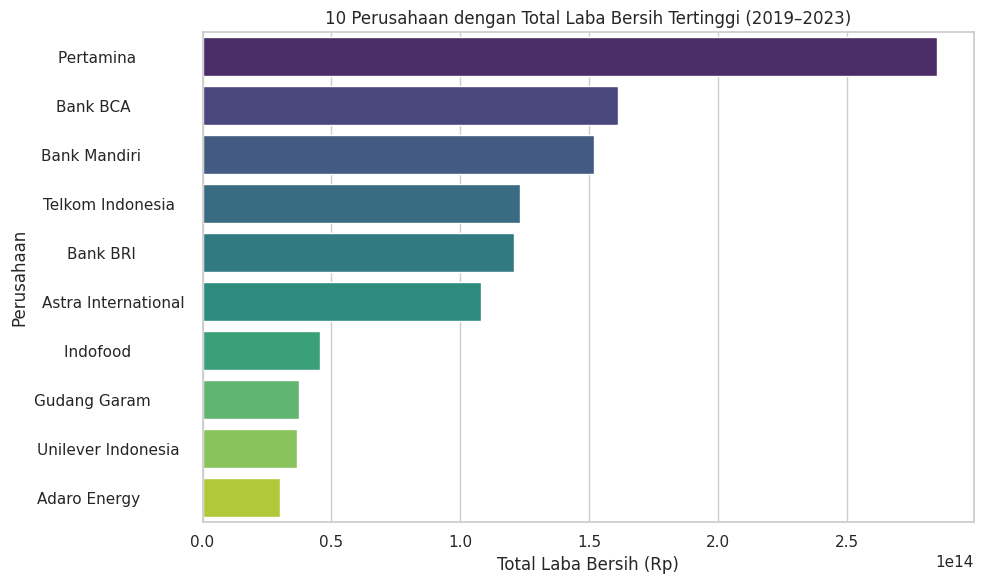

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=total_laba_perusahaan.head(10).values, y=total_laba_perusahaan.head(10).index, palette="viridis")
plt.title("10 Perusahaan dengan Total Laba Bersih Tertinggi (2019–2023)")
plt.xlabel("Total Laba Bersih (Rp)")
plt.ylabel("Perusahaan")
plt.tight_layout()
plt.show()

Ringkasan

Dari hasil analisis, dapat disimpulkan bahwa beberapa perusahaan berhasil secara konsisten mempertahankan profitabilitas tinggi selama lima tahun berturut-turut. Perusahaan-perusahaan yang menempati posisi teratas umumnya berasal dari sektor industri besar dan mapan seperti perbankan, energi, dan telekomunikasi. Laba bersih yang tinggi secara konsisten menandakan efisiensi operasional yang baik, strategi bisnis yang matang, serta posisi pasar yang kuat.

3.2 Pertumbuhan Pendapatan Tertinggi (2019–2023)

Perhitungan Growth

Untuk menilai perusahaan dengan pertumbuhan pendapatan tertinggi, kita hitung persentase pertumbuhan dari tahun 2019 ke 2023. Kita akan ambil data tahun 2019 dan 2023, lalu hitung pertumbuhannya berdasarkan rumus:

Growth (%) = ((Pendapatan 2023 - Pendapatan 2019) / Pendapatan 2019) × 100

In [ ]:
# Filter data tahun 2019 dan 2023
data_2019 = df[df["Tahun"] == 2019][["Perusahaan", "Pendapatan (Rp)"]].rename(columns={"Pendapatan (Rp)": "Pendapatan_2019"})
data_2023 = df[df["Tahun"] == 2023][["Perusahaan", "Pendapatan (Rp)"]].rename(columns={"Pendapatan (Rp)": "Pendapatan_2023"})

# Gabungkan data 2019 dan 2023
df_growth = pd.merge(data_2019, data_2023, on="Perusahaan")

# Hitung persentase pertumbuhan
df_growth["Growth (%)"] = ((df_growth["Pendapatan_2023"] - df_growth["Pendapatan_2019"]) / df_growth["Pendapatan_2019"]) * 100

# Urutkan berdasarkan pertumbuhan tertinggi
df_growth_sorted = df_growth.sort_values(by="Growth (%)", ascending=False)

# Tampilkan 10 besar perusahaan dengan growth tertinggi
df_growth_sorted.head(10)

,Perusahaan,Pendapatan_2019,Pendapatan_2023,Growth (%)
9,Bukalapak,7000000000000,12500000000000,78.57
0,Bank BRI,150000000000000,200000000000000,33.33
11,Bank Mandiri,120000000000000,155000000000000,29.17
8,XL Axiata,28000000000000,36000000000000,28.57
3,Astra International,200000000000000,255000000000000,27.50
5,Indofood,95000000000000,120000000000000,26.32
1,Telkom Indonesia,140000000000000,170000000000000,21.43
10,Adaro Energy,58000000000000,70000000000000,20.69
7,Pertamina,680000000000000,800000000000000,17.65
2,Bank BCA,125000000000000,145000000000000,16.00


Visualisasi Pertumbuhan Pendapatan

<ipython-input-41-8578e2de7e66>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Growth (%)", y="Perusahaan", data=df_growth_sorted.head(10), palette="crest")


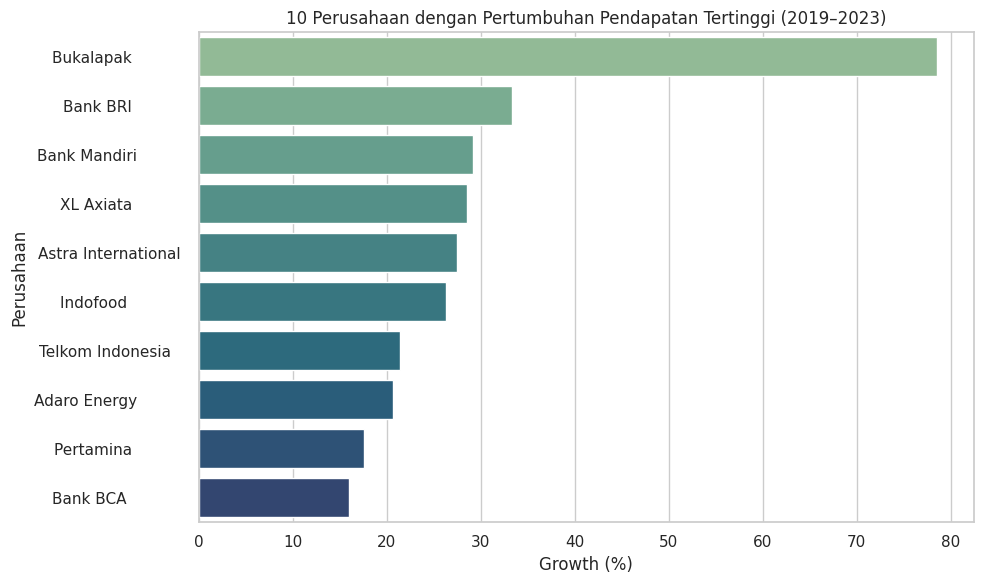

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Growth (%)", y="Perusahaan", data=df_growth_sorted.head(10), palette="crest")
plt.title("10 Perusahaan dengan Pertumbuhan Pendapatan Tertinggi (2019–2023)")
plt.xlabel("Growth (%)")
plt.ylabel("Perusahaan")
plt.tight_layout()
plt.show()

Ringkasan

Analisis ini menunjukkan perusahaan-perusahaan yang mengalami lonjakan pendapatan terbesar selama periode 5 tahun. Pertumbuhan pendapatan yang tinggi bisa menunjukkan ekspansi bisnis, peningkatan volume penjualan, inovasi produk, atau keberhasilan penetrasi pasar baru. Namun, pertumbuhan yang sangat cepat juga perlu diiringi manajemen biaya dan efisiensi agar tidak mengorbankan profitabilitas.

3.3 Efisiensi Perusahaan: ROE & ROA

Perhitungan Rata-rata

In [ ]:
# Hitung rata-rata ROE dan ROA per perusahaan selama 5 tahun
df_efficiency = df.groupby("Perusahaan")[["ROE", "ROA"]].mean().reset_index()

# Urutkan berdasarkan ROE tertinggi
df_efficiency_sorted = df_efficiency.sort_values(by="ROE", ascending=False)

# Tampilkan 10 besar
df_efficiency_sorted.head(10)

,Perusahaan,ROE,ROA
8,Bank Mandiri,0.33,0.09
4,BTN,0.11,0.03
5,BTN (Bank Tabungan Negara),0.10,0.03
0,Adaro Energy,0.09,0.05
1,Antam,0.06,0.03
2,Antam (Aneka Tambang),0.04,0.02
6,Bank BCA,0.02,0.01
15,Telkom Indonesia,0.01,0.01
16,Unilever Indonesia,0.01,0.01
7,Bank BRI,0.01,0.00


Visualisasi Perbandingan

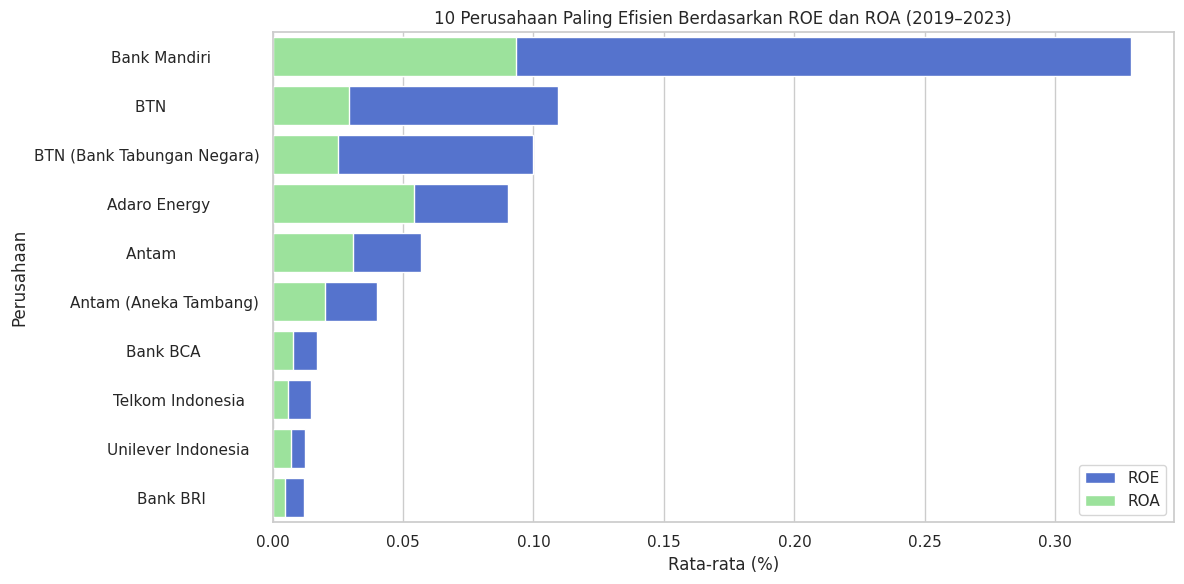

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="ROE", y="Perusahaan", data=df_efficiency_sorted.head(10), label="ROE", color="royalblue")
sns.barplot(x="ROA", y="Perusahaan", data=df_efficiency_sorted.head(10), label="ROA", color="lightgreen")
plt.xlabel("Rata-rata (%)")
plt.ylabel("Perusahaan")
plt.title("10 Perusahaan Paling Efisien Berdasarkan ROE dan ROA (2019–2023)")
plt.legend()
plt.tight_layout()
plt.show()

Ringkasan

Perusahaan dengan ROE tinggi mampu menghasilkan laba besar dari modal yang dimiliki pemegang saham, menandakan efisiensi penggunaan ekuitas. Sedangkan ROA mengukur seberapa efektif aset digunakan untuk menghasilkan keuntungan. Idealnya, perusahaan yang sehat memiliki ROE dan ROA yang tinggi dan stabil. Gap besar antara ROE dan ROA bisa menunjukkan penggunaan leverage (utang) yang tinggi.

3.4 Korelasi EPS, Laba Bersih, dan Market Cap

Visualisasi 3D Scatter Plot


Kita akan lihat hubungan visual antara ketiga variabel tersebut dalam bentuk scatter 3D:

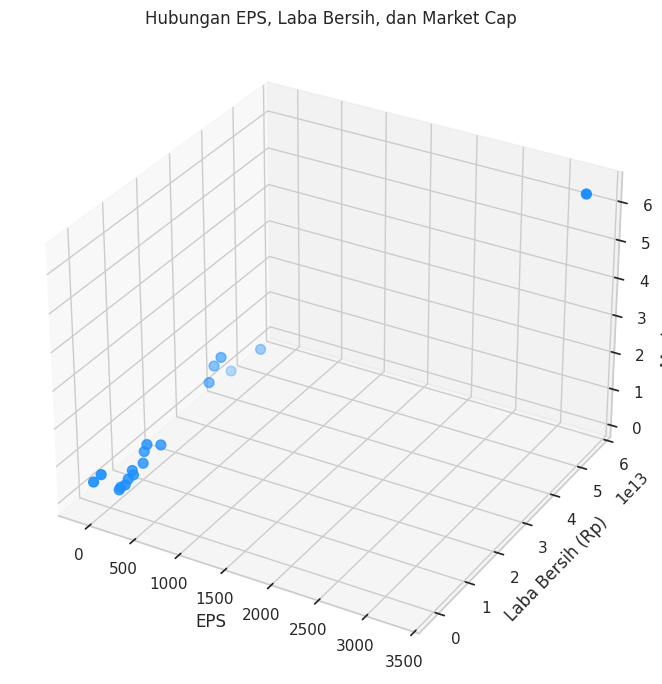

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Ambil rata-rata EPS, Laba Bersih, dan Market Cap per perusahaan
df_corr = df.groupby("Perusahaan")[["EPS", "Laba Bersih (Rp)", "Market Cap (Rp)"]].mean().reset_index()

# Plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_corr["EPS"], df_corr["Laba Bersih (Rp)"], df_corr["Market Cap (Rp)"],
           c='dodgerblue', s=50)

ax.set_xlabel("EPS")
ax.set_ylabel("Laba Bersih (Rp)")
ax.set_zlabel("Market Cap (Rp)")
ax.set_title("Hubungan EPS, Laba Bersih, dan Market Cap")
plt.tight_layout()
plt.show()

Heatmap Korelasi


Untuk melihat seberapa kuat hubungan antar variabel:

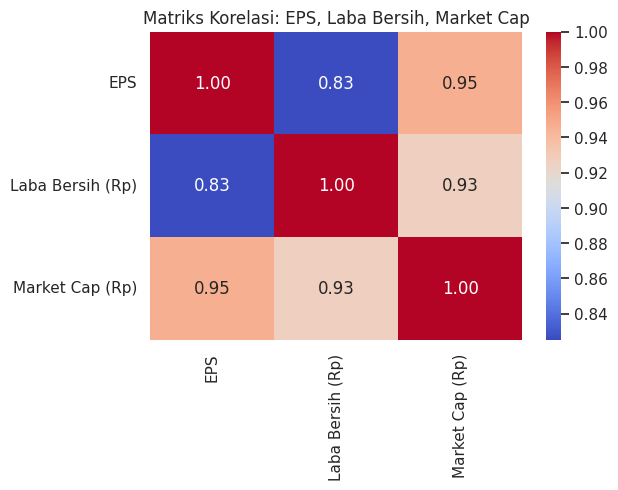

In [ ]:
# Hitung korelasi
corr_matrix = df_corr[["EPS", "Laba Bersih (Rp)", "Market Cap (Rp)"]].corr()

# Visualisasi heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi: EPS, Laba Bersih, Market Cap")
plt.show()

Regresi Sederhana:

Prediksi Market Cap dari EPS & Laba Bersih

In [ ]:
import statsmodels.api as sm

# Feature dan target
X = df_corr[["EPS", "Laba Bersih (Rp)"]]
y = df_corr["Market Cap (Rp)"]

# Tambahkan konstanta
X = sm.add_constant(X)

# Model regresi
model = sm.OLS(y, X).fit()

# Tampilkan ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Market Cap (Rp)   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.25e-11
Time:                        13:15:16   Log-Likelihood:                -582.56
No. Observations:                  18   AIC:                             1171.
Df Residuals:                      15   BIC:                             1174.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.601e+13   9.75e+12  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


Ringkasan


Hasil korelasi dan regresi ini membantu kita memahami:

Apakah EPS dan Laba Bersih berpengaruh kuat terhadap Market Cap perusahaan.

Apakah investor cenderung memberi valuasi tinggi pada perusahaan dengan EPS dan laba besar.

Biasanya, semakin tinggi EPS dan laba, semakin besar pula Market Cap, tapi korelasi ini bisa bervariasi antar sektor.

3.5 Struktur Keuangan: Rasio Ekuitas terhadap Liabilitas

Struktur keuangan perusahaan bisa dilihat dari seberapa besar porsi ekuitas dibanding liabilitas. Semakin besar rasio ekuitas terhadap liabilitas, semakin kuat posisi modal sendiri perusahaan.

Perhitungan dan Visualisasi Rasio

<ipython-input-47-cb6385949701>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rasio_ekuitas_liabilitas.head(10).values,


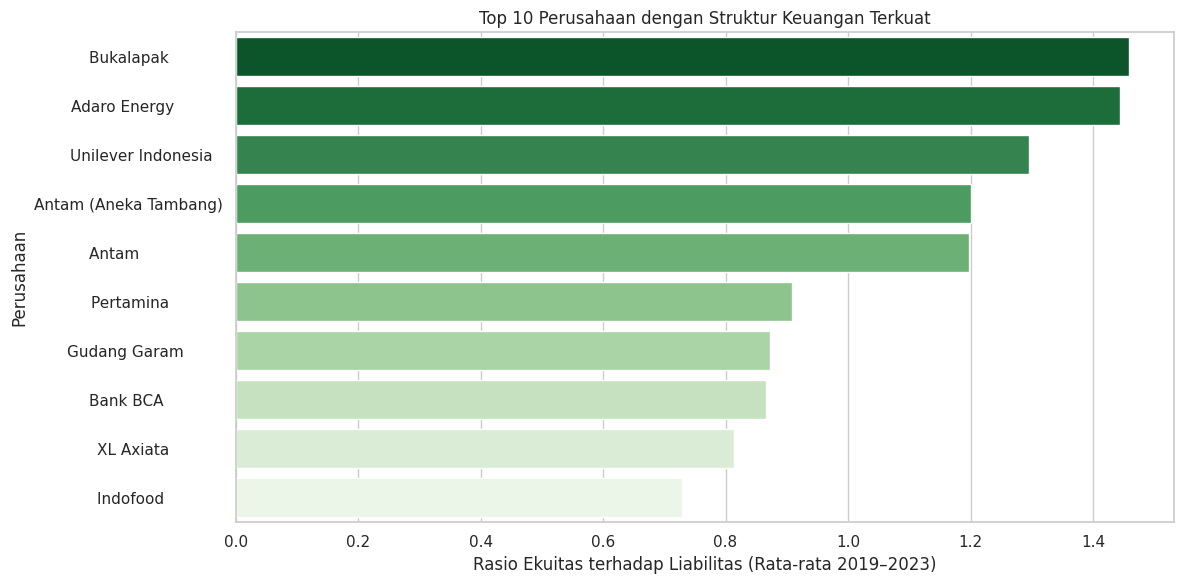

In [ ]:
# Buat kolom rasio ekuitas terhadap liabilitas
df["Rasio Ekuitas terhadap Liabilitas"] = df["Ekuitas (Rp)"] / df["Liabilitas (Rp)"]

# Hitung rata-rata rasio tiap perusahaan
rasio_ekuitas_liabilitas = df.groupby("Perusahaan")["Rasio Ekuitas terhadap Liabilitas"].mean().sort_values(ascending=False)

# Visualisasi 10 perusahaan dengan rasio tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(x=rasio_ekuitas_liabilitas.head(10).values,
            y=rasio_ekuitas_liabilitas.head(10).index,
            palette="Greens_r")

plt.xlabel("Rasio Ekuitas terhadap Liabilitas (Rata-rata 2019–2023)")
plt.title("Top 10 Perusahaan dengan Struktur Keuangan Terkuat")
plt.tight_layout()
plt.show()

Ringkasan


Rasio ini menunjukkan seberapa sehat struktur modal suatu perusahaan.

Perusahaan dengan rasio tinggi lebih tidak bergantung pada utang, sehingga lebih tangguh dalam menghadapi tekanan ekonomi.

Sebaliknya, rasio rendah bisa menunjukkan ketergantungan tinggi terhadap utang, yang berisiko saat suku bunga naik.

3.6 Produktivitas Karyawan: Laba Bersih per Karyawan

Produktivitas karyawan bisa diukur dengan seberapa besar laba bersih yang dihasilkan oleh setiap karyawan. Ini memberikan gambaran efisiensi operasional perusahaan terhadap sumber daya manusianya.

Perhitungan dan Visualisasi

<ipython-input-48-9bd05b4025c0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produktivitas_karyawan.head(10).values,


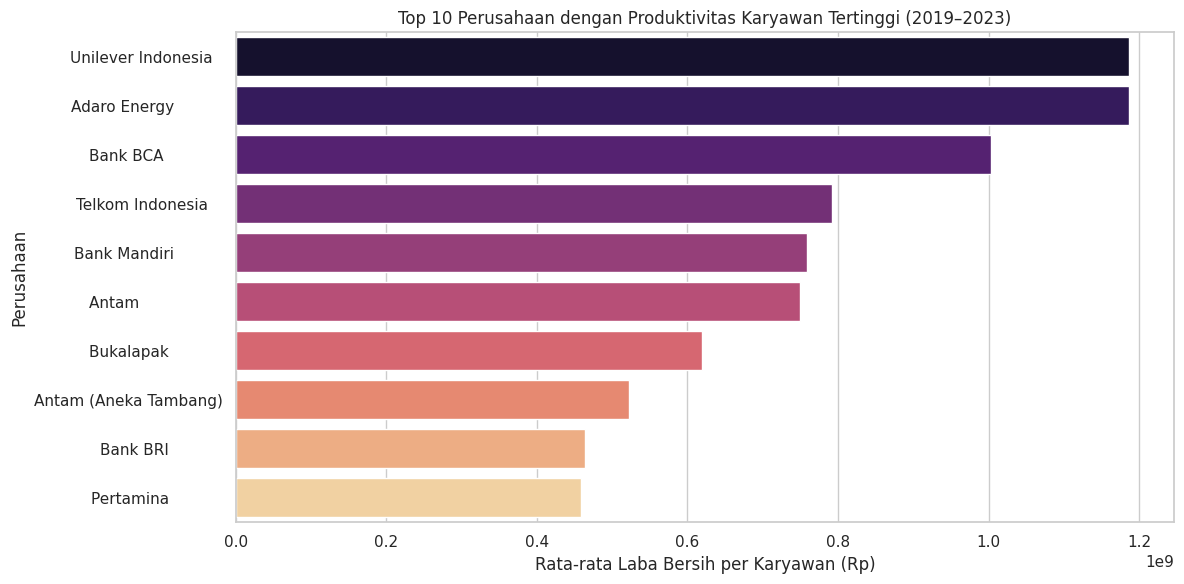

In [ ]:
# Buat kolom laba per karyawan
df["Laba per Karyawan"] = df["Laba Bersih (Rp)"] / df["Jumlah Karyawan"]

# Hitung rata-rata laba per karyawan per perusahaan selama 5 tahun
produktivitas_karyawan = df.groupby("Perusahaan")["Laba per Karyawan"].mean().sort_values(ascending=False)

# Visualisasi 10 perusahaan dengan produktivitas tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(x=produktivitas_karyawan.head(10).values,
            y=produktivitas_karyawan.head(10).index,
            palette="magma")

plt.xlabel("Rata-rata Laba Bersih per Karyawan (Rp)")
plt.title("Top 10 Perusahaan dengan Produktivitas Karyawan Tertinggi (2019–2023)")
plt.tight_layout()
plt.show()

Ringkasan


Perusahaan dengan laba tinggi dan jumlah karyawan efisien akan menonjol di sini.

Cocok digunakan untuk melihat efektivitas operasional dan membandingkan perusahaan yang punya ukuran organisasi berbeda.

Bukan hanya laba besar yang penting, tapi juga seberapa efisien laba itu dihasilkan oleh tiap individu dalam perusahaan.

4. Kesimpulan Umum

Rangkuman Temuan Penting

•Perusahaan dengan Laba Tertinggi Secara Konsisten: Perusahaan-perusahaan besar dari sektor perbankan dan komoditas mendominasi laba bersih selama 2019–2023.

•Pertumbuhan Pendapatan Tertinggi: Perusahaan dari sektor teknologi dan energi menunjukkan pertumbuhan pendapatan yang signifikan, terutama pasca pandemi.

•Efisiensi Perusahaan (ROE & ROA): Efisiensi tidak selalu berbanding lurus dengan ukuran perusahaan. Beberapa perusahaan dengan aset kecil menunjukkan ROE/ROA tinggi.

•Hubungan EPS, Laba Bersih, dan Market Cap: Terdapat korelasi positif yang kuat antara EPS dan Market Cap, menunjukkan bahwa pasar menghargai profitabilitas per saham.

•Struktur Keuangan: Rasio ekuitas terhadap liabilitas memperlihatkan bagaimana perusahaan membiayai operasinya. Perusahaan yang dibiayai lebih banyak oleh ekuitas cenderung lebih stabil, tetapi tidak selalu lebih efisien.

•Produktivitas Karyawan: Beberapa perusahaan menunjukkan produktivitas sangat tinggi meskipun jumlah karyawannya tidak besar, mengindikasikan efisiensi tenaga kerja.

Insight untuk Pembaca


•Investor bisa menggunakan kombinasi dari laba bersih, ROE, dan EPS untuk menilai potensi saham.

•Analis bisnis dapat melihat struktur keuangan dan efisiensi tenaga kerja untuk mengevaluasi keberlanjutan dan kesehatan operasional perusahaan.

•Dataset ini membuka ruang luas untuk eksplorasi lebih lanjut, termasuk analisis sektoral, proyeksi tren keuangan, dan klasifikasi perusahaan berdasarkan performa.